<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #3: ARIMAX, Compositions

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

<span style="color:red; font-size: 14pt;"> DEADLINE: 10 October 2017 23:59:59 </span>

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 


<h1 align="center">Check Questions (20%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1** Опишите ситуацию (аргументированно), в котором композиция Adaptive Selection будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 2**  Опишите ситуацию (аргументированно), в котором композиция Adaptive Composition будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 3** Что значит смешиваемость (mixability) игры (в теории агрегирующего алгоритма)?

<Ответ>

**Вопрос 4**: Верно ли, что для смешиваемых игр процесс потерь любой композиции (любого алгоритма) будет расти со временем (с ростом $t$) не быстрее, чем процесс потерь лучшего из базовых алгоритмов? Если нет - приведит пример, когда это не так.

### $$ \mathrm{Loss}_{Composition}(T)\leq \inf\limits_{BA} \mathrm{Loss}_{BA}(T)+C$$

<Ответ>

<h1 align="center">2. Contest: electricity comsumption contest (80%)</h1>
Take part in <a href='https://www.kaggle.com/t/de102b28cae74e6ead7492ff12efbc63'>contest</a>.
<span style='color:red'> You need to send the final code that is used for building forecast.</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = pd.read_csv('train.csv')

Хочу посмотреть есть ли зависимость между температурой и потреблением энергии.

In [3]:
actual = data['ACTUAL']
temp = data['Temp']

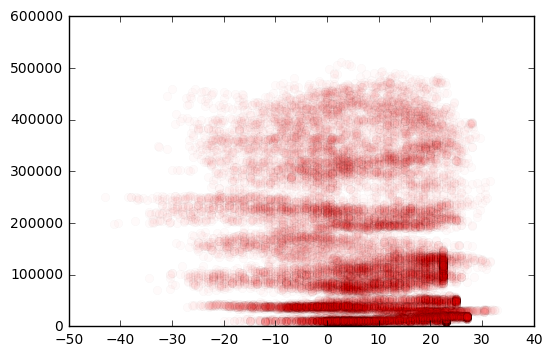

In [4]:
plt.plot(temp, actual, 'ro', alpha=0.02)
plt.show()

Хм, есть, но не супер пупер сильная.
Значит, зависимость от температуры не супер пупер важная. А если бы она была важная, то имело бы смысл использовать лин регрессию или модификацию ARIMA.

Сделаем трейн выборки.

In [5]:
train = []
i = 0
for elem in actual:
    if not math.isnan(elem):
        if len(train) == i:
            train.append([])
        train[i].append(elem)
        nan = False
    else:
        if nan is False:
            i = i + 1
            nan = True

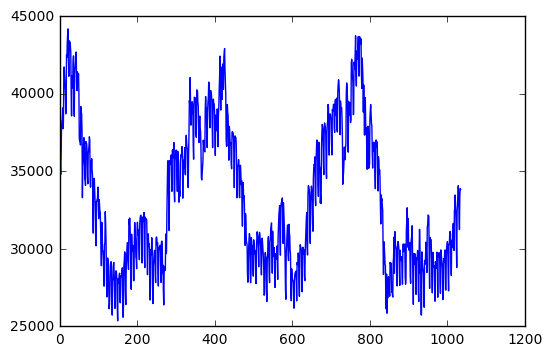

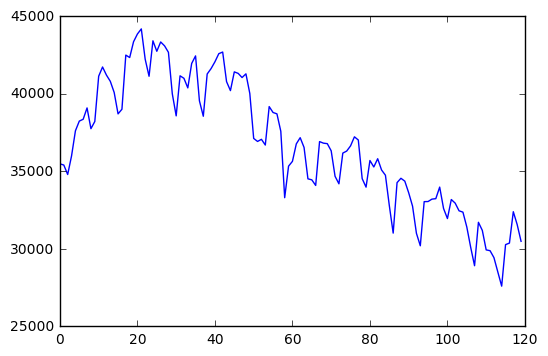

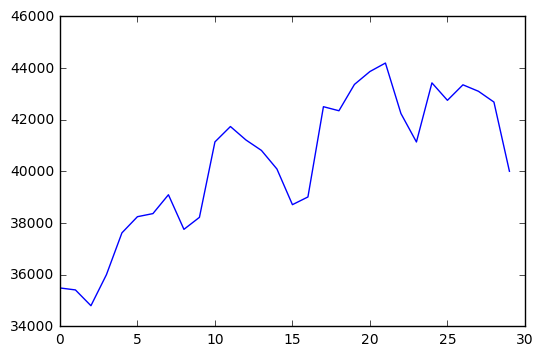

In [12]:
plt.plot(train[0])
plt.show()
plt.plot(train[0][:120])
plt.show()
plt.plot(train[0][:30])
plt.show()

Точно есть годовая и недельная сезонности. (по крайней мере в первом куске ряда)

# Рассмотрим модель Хольта-Винтера.

In [7]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def Holt_Winter(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN] * (T + h)
    
    l = np.NaN
    b = np.NaN
    s = [np.NaN] * (T + h)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = np.array(x[:(cntr + 1)]).mean()
            
            if math.isnan(b):
                b = 0.
 
            if math.isnan(s[cntr % p]):
                s[cntr % p] = x[cntr] / (l + b) 
            
            l_t_1 = l
            b_t_1 = b
            l = alpha * x[cntr] / s[cntr - p] + (1 - alpha) * (l_t_1 + b_t_1)
            b = beta * (l - l_t_1) + (1 - beta) * b_t_1
            s[cntr] = delta * x[cntr] / (l_t_1 + b_t_1) + (1 - delta) * s[cntr - p]
            FORECAST[cntr + h] = (l + b * h) * s[cntr - p + (h % p)]
    return FORECAST

Перебираем кучу параметров. Для сезонности рассмотрим недельную, месячную и годовую сезоннсти.

In [8]:
ALPHA = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
BETA = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
DELTA = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
SEASONALITY = [7, 30, 365]
HoltWinterParamsArray = [{'alpha':alpha, 'delta':delta, 'beta':beta,
                      'seasonality_period':season} 
                     for alpha in ALPHA for delta in DELTA for beta in BETA for season in SEASONALITY]

Теперь для каждого ряда подберем модель и посмотрим на лосс(в качестве теста возьмем предсказание на последних 30 известных днях (так мы хотим предсказать на 30 дней, но это значит, что для любого промежутка из 30 дней мы опираемся на данные только до этого промежутка)).

In [13]:
result = []

In [14]:
for ts in train:
    mmin = 1000000000
    mmin_p = HoltWinterParamsArray[0]
    for p in HoltWinterParamsArray:
        test = np.array(Holt_Winter(ts, 30, p)[-60:][:30])
        test_real = np.array(ts[-30:])
        mape = np.mean(np.abs((test - test_real) / test_real)) * 100
        if mape < mmin:
            mmin = mape
            mmin_p = p
    result.append(Holt_Winter(ts, 30, mmin_p)[-30:])
    print(mmin, mmin_p)

2.1540440806 {'delta': 0.1, 'seasonality_period': 7, 'alpha': 0.001, 'beta': 0.7}
2.4890939844 {'delta': 0.01, 'seasonality_period': 7, 'alpha': 0.001, 'beta': 0.001}
1.46659265964 {'delta': 0.1, 'seasonality_period': 7, 'alpha': 0.001, 'beta': 0.7}
3.3833588492 {'delta': 0.2, 'seasonality_period': 30, 'alpha': 0.001, 'beta': 0.9}
3.12887954362 {'delta': 0.1, 'seasonality_period': 7, 'alpha': 0.001, 'beta': 0.9}
2.81337063906 {'delta': 0.01, 'seasonality_period': 7, 'alpha': 0.001, 'beta': 0.6}
0.915328594079 {'delta': 0.1, 'seasonality_period': 7, 'alpha': 0.001, 'beta': 0.9}
1.71730265576 {'delta': 0.01, 'seasonality_period': 7, 'alpha': 0.001, 'beta': 0.001}
4.78953798378 {'delta': 0.001, 'seasonality_period': 7, 'alpha': 0.001, 'beta': 0.01}
2.27499992056 {'delta': 0.7, 'seasonality_period': 365, 'alpha': 0.001, 'beta': 0.99}
4.02114964311 {'delta': 0.001, 'seasonality_period': 30, 'alpha': 0.001, 'beta': 0.01}
2.63055101927 {'delta': 0.4, 'seasonality_period': 30, 'alpha': 0.01, '

Ну не так плохо, вроде.

Но видим, что нет особого "единства" параметров, поэтому для каждого куска воспользуемся его собственным приближением.

Но как-то неидеально. В любом случае надо еще Ариму попробовать. Ну и еще можно линейную регрессию.

В данном случае на публичных тестах контеста вышло 6.2. Не так плохо, но есть куда расти.

In [27]:
result_predicted = []

In [28]:
for res in result:
    for r in res:
        result_predicted.append(r)

In [52]:
result_ids = []

In [53]:
for i in range(len(data)):
    if math.isnan(data['ACTUAL'][i]):
        result_ids.append((int)(data['ID'][i]))

In [54]:
print(np.asarray([result_ids, result_predicted]).T)

[[   1036.           33058.53300303]
 [   1037.           33032.3603327 ]
 [   1038.           31254.5065097 ]
 ..., 
 [  21546.          218474.56587369]
 [  21547.          219414.42363196]
 [  21548.          218695.70749508]]


In [61]:
resultDataFrame = pd.DataFrame(np.asarray([result_ids, result_predicted]).T,
                               columns=['ID', 'PREDICTED'])
resultDataFrame['ID'] = resultDataFrame['ID'].astype(int)

In [62]:
resultDataFrame.head()

,ID,PREDICTED
0,1036,33058.533003
1,1037,33032.360333
2,1038,31254.506510
3,1039,30339.861033
4,1040,33253.946794


In [63]:
# Put your code for 
final_forecast = resultDataFrame

In [64]:
# save forecast to disk for further submission
final_forecast.to_csv('result.csv', format='csv', index=False)

# SARIMA

Ариму я предпочитаю считать на R.